## Test data ERA5


In [19]:
import xarray as xr
import matplotlib.pyplot as plt 

# open the NetCDF file
ds_t2m = xr.open_dataset("data_stream-enda_stepType-accum.nc")
ds_pr = xr.open_dataset("data_stream-oper_stepType-accum.nc")

# see metadata and available variables
print(ds_t2m)

<xarray.Dataset> Size: 8MB
Dimensions:     (valid_time: 744, latitude: 45, longitude: 63)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 6kB 1986-12-01 ... 1988-12-31T21:...
  * latitude    (latitude) float64 360B 54.0 53.5 53.0 52.5 ... 33.0 32.5 32.0
  * longitude   (longitude) float64 504B 51.0 51.5 52.0 52.5 ... 81.0 81.5 82.0
    expver      (valid_time) <U4 12kB ...
Data variables:
    tp          (valid_time, latitude, longitude) float32 8MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-09-29T11:38 GRIB to CDM+CF via cfgrib-0.9.1...


<xarray.DataArray 'tp' (valid_time: 744)> Size: 3kB
[744 values with dtype=float32]
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 6kB 1986-12-01 ... 1988-12-31T21:...
    latitude    float64 8B 40.0
    longitude   float64 8B 70.0
    expver      (valid_time) <U4 12kB ...
Attributes: (12/32)
    GRIB_paramId:                             228
    GRIB_dataType:                            em
    GRIB_numberOfPoints:                      2835
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            accum
    ...                                       ...
    GRIB_totalNumber:                         10
    GRIB_units:                               m
    long_name:                                Total precipitation
    units:                                    m
    standard_name:                            unknown
    GRIB_surface:                             0.

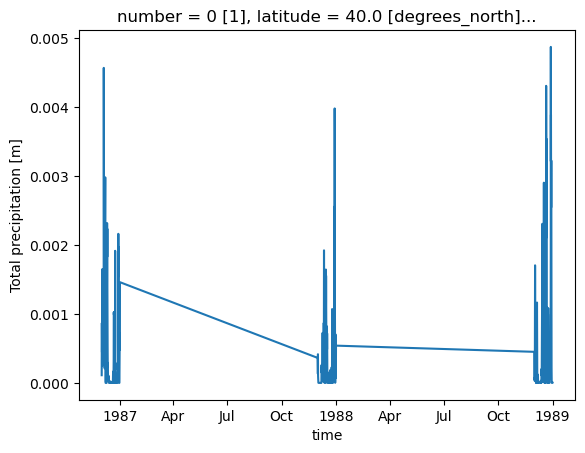

In [21]:
# look at the structure
# pick the nearest grid point
ts_t2m = ds_t2m["tp"].sel(latitude=40, longitude=70, method="nearest")

# look at the time series
print(ts_t2m)

# plot it
ts_t2m.plot()

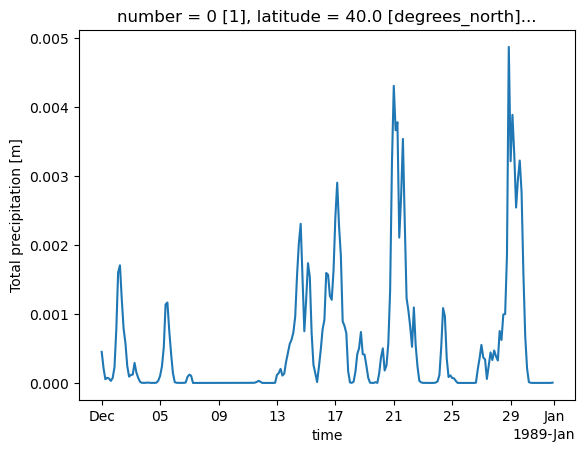

In [22]:
ts_t2m_1988 = ts_t2m.sel(valid_time=slice('1988-11-20', '1989-01-01'))
ts_t2m_1988.plot()
#plt.savefig('ERA5_pr_1988-89.png')
plt.show()

In [16]:
print(ds_pr)

<xarray.Dataset> Size: 99MB
Dimensions:     (valid_time: 2232, latitude: 89, longitude: 125)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 18kB 1986-12-01 ... 1988-12-31T23...
  * latitude    (latitude) float64 712B 54.0 53.75 53.5 ... 32.5 32.25 32.0
  * longitude   (longitude) float64 1kB 51.0 51.25 51.5 ... 81.5 81.75 82.0
    expver      (valid_time) <U4 36kB ...
Data variables:
    tp          (valid_time, latitude, longitude) float32 99MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-09-29T11:38 GRIB to CDM+CF via cfgrib-0.9.1...


In [17]:
ts_pr = ds_pr["tp"].sel(latitude=40, longitude=70, method="nearest")

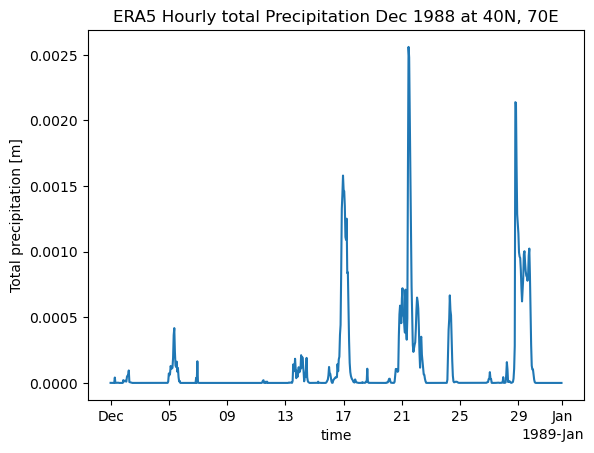

In [44]:
ts_pr_1988 = ts_pr.sel(valid_time=slice('1988-11-20', '1989-01-01'))
ts_pr_1988.plot()
plt.title('ERA5 Hourly total Precipitation Dec 1988 at 40N, 70E')
plt.savefig('ERA5_pr_1988-89.png')
plt.show()

In [33]:
ds_pr.isel(valid_time=1).plot(cmap="coolwarm", robust=True, size=5)

ValueError: Dataset.plot cannot be called directly. Use an explicit plot method, e.g. ds.plot.scatter(...)

In [27]:
ts_pr_1988

<xarray.DataArray 'tp' (valid_time: 744)> Size: 3kB
[744 values with dtype=float32]
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 6kB 1988-12-01 ... 1988-12-31T23:...
    latitude    float64 8B 40.0
    longitude   float64 8B 70.0
    expver      (valid_time) <U4 12kB ...
Attributes: (12/32)
    GRIB_paramId:                             228
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      11125
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            accum
    ...                                       ...
    GRIB_totalNumber:                         0
    GRIB_units:                               m
    long_name:                                Total precipitation
    units:                                    m
    standard_name:                            unknown
    GRIB_surface:                             0.0

In [32]:
ds_pr["tp"].isel(time=1).plot(cmap="coolwarm", robust=True, size=5)

ValueError: Dimensions {'time'} do not exist. Expected one or more of ('valid_time', 'latitude', 'longitude')

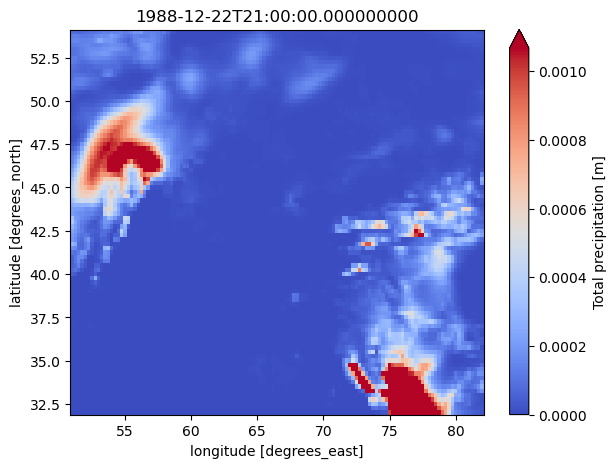

In [45]:

da = ds_pr["tp"].sel(valid_time="1988-12-22T21:00:00.000000000")

da.plot(cmap="coolwarm", robust=True, size=5)

plt.title(str(da["valid_time"].values))  # extract timestamp from coords
plt.savefig('ERA5_pr_1988-12-22_21UTC.png')
plt.show()

In [36]:
ds_pr[valid_time].values

NameError: name 'valid_time' is not defined

In [37]:
ds_pr["valid_time"].values

array(['1986-12-01T00:00:00.000000000', '1986-12-01T01:00:00.000000000',
       '1986-12-01T02:00:00.000000000', ...,
       '1988-12-31T21:00:00.000000000', '1988-12-31T22:00:00.000000000',
       '1988-12-31T23:00:00.000000000'], dtype='datetime64[ns]')

In [46]:
ds_daily = xr.open_dataset("3e5afa9743c676becb53f4418a6ff8be.nc")

In [47]:
ds_daily

<xarray.Dataset> Size: 1MB
Dimensions:     (valid_time: 31, latitude: 89, longitude: 125)
Coordinates:
    number      int64 8B ...
  * latitude    (latitude) float64 712B 54.0 53.75 53.5 ... 32.5 32.25 32.0
  * longitude   (longitude) float64 1kB 51.0 51.25 51.5 ... 81.5 81.75 82.0
  * valid_time  (valid_time) datetime64[ns] 248B 1988-12-01 ... 1988-12-31
Data variables:
    tp          (valid_time, latitude, longitude) float32 1MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-09-29T12:23 GRIB to CDM+CF via cfgrib-0.9.1...

<xarray.DataArray 'tp' (valid_time: 31)> Size: 124B
[31 values with dtype=float32]
Coordinates:
    number      int64 8B ...
    latitude    float64 8B 40.0
    longitude   float64 8B 70.0
  * valid_time  (valid_time) datetime64[ns] 248B 1988-12-01 ... 1988-12-31
Attributes: (12/32)
    GRIB_paramId:                             228
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      11125
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            accum
    ...                                       ...
    GRIB_totalNumber:                         0
    GRIB_units:                               m
    long_name:                                Total precipitation
    units:                                    m
    standard_name:                            unknown
    GRIB_surface:                             0.0


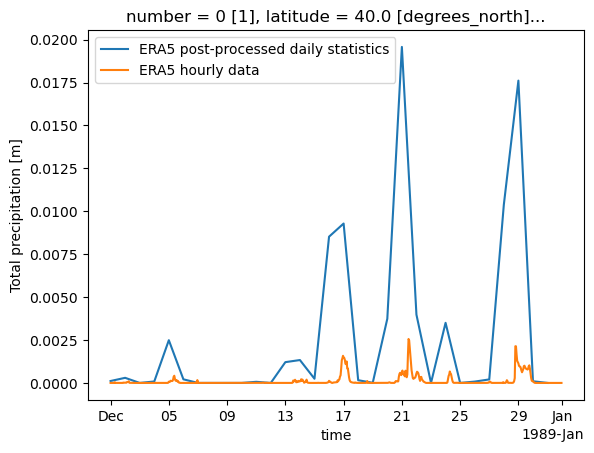

In [54]:
# look at the structure
# pick the nearest grid point
ts_daily = ds_daily["tp"].sel(latitude=40, longitude=70, method="nearest")

# look at the time series
print(ts_daily)

# plot it

ts_daily.plot(label = 'ERA5 post-processed daily statistics')
ts_pr_1988.plot(label = 'ERA5 hourly data')
plt.legend()
plt.savefig('ERA5_pr_daily_1988.png')

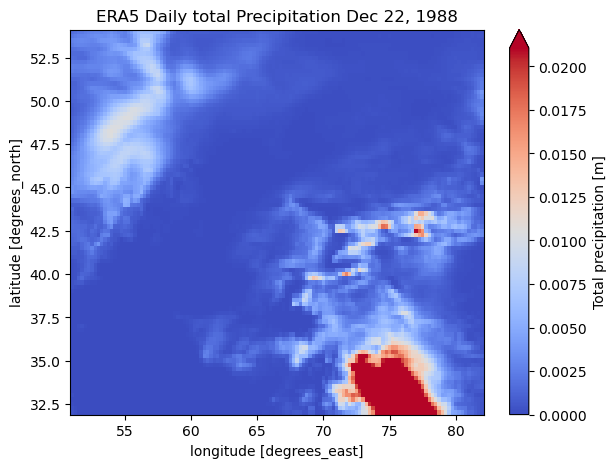

In [62]:
db = ds_daily["tp"].sel(valid_time="1988-12-22")
db.plot(cmap="coolwarm", robust=True, size=5)

#plt.title(str(db["valid_time"].values))  # extract timestamp from coords
#plt.savefig('ERA5_pr_1988-12-22_21UTC.png')
plt.title('ERA5 Daily total Precipitation Dec 22, 1988')
plt.savefig('ERA5_Daily_22ded.png')
plt.show()

In [56]:
ds_daily

<xarray.Dataset> Size: 1MB
Dimensions:     (valid_time: 31, latitude: 89, longitude: 125)
Coordinates:
    number      int64 8B ...
  * latitude    (latitude) float64 712B 54.0 53.75 53.5 ... 32.5 32.25 32.0
  * longitude   (longitude) float64 1kB 51.0 51.25 51.5 ... 81.5 81.75 82.0
  * valid_time  (valid_time) datetime64[ns] 248B 1988-12-01 ... 1988-12-31
Data variables:
    tp          (valid_time, latitude, longitude) float32 1MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-09-29T12:23 GRIB to CDM+CF via cfgrib-0.9.1...